In [1]:
# !pip install nixtlats

In [2]:
import pandas as pd
import numpy as np
# import tqdm
import os
import warnings
warnings.filterwarnings('ignore')
np.random.seed()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
import math
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Conv1D
from matplotlib import pyplot as plt
import keras
# !pip install -q -U keras-tuner
import keras_tuner as kt
import tensorflow as tf
import matplotlib.pyplot as plt
# import neuralforecast

from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS, LSTM

In [3]:
# pip install nixtlats

In [4]:
# from nixtlats import TimeGPT

In [5]:
data = pd.read_csv("2.2 merged_aggregated_hourly_without_block_id.csv")

In [6]:
df = data[["tstp","avg_energy_per_lclid"]]

In [7]:
# df["unique_id"] = "energy_consumption"

In [8]:
df = df.rename(columns = {"tstp":"ds","avg_energy_per_lclid":"y"})

In [9]:
df

,ds,y
0,2011-11-23 09:00:00,0.565000
1,2011-11-23 10:00:00,0.251333
2,2011-11-23 11:00:00,0.303286
3,2011-11-23 12:00:00,0.658900
4,2011-11-23 13:00:00,0.481769
...,...,...
19859,2014-02-27 20:00:00,0.694360
19860,2014-02-27 21:00:00,0.657011
19861,2014-02-27 22:00:00,0.587121
19862,2014-02-27 23:00:00,0.469473


In [10]:
# pip install statsforecast

In [11]:
# from statsforecast import StatsForecast
# from statsforecast.models import AutoARIMA
# from statsforecast.utils import AirPassengersDF

In [12]:
# sf = StatsForecast(
#     models = [AutoARIMA(season_length = 12)],
#     freq = 'M'
# )

# sf.fit(df)
# sf.predict(h=12, level=[95])

# Neural Forecast

In [13]:
df["ds"]=pd.to_datetime(df["ds"])

In [14]:
# dataframe = df.loc[:,"avg_energy_per_lclid"]
# dataset = dataframe.values
# dataset = dataset.astype("float32")

In [15]:
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
#     n_vars = 1
#     df = pd.DataFrame(data)
#     cols, names = list(), list()
#     # input sequence (t-n, ... t-1)
#     for i in range(n_in, 0, -1):
#         cols.append(df.shift(i))
#         names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
#     # forecast sequence (t, t+1, ... t+n)
#     for i in range(0, n_out):
#         cols.append(df.shift(-i))
#         if i == 0:
#             names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
#         else:
#             names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
#     # put it all together
#     agg = pd.concat(cols, axis=1)
#     agg.columns = names
#     # drop rows with NaN values
#     if dropnan:
#         agg.dropna(inplace=True)
#     return agg

In [16]:
# history = 7
# future = 1
# reframed = series_to_supervised(dataset, history,future)
# reframed.head(3)



In [17]:
# reframed["tstp"] = df.tstp.values[7:]

In [18]:
# reframed

In [19]:
# reframed.columns

In [20]:
# reframed = reframed.reindex(['tstp','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)',
#        'var1(t-2)', 'var1(t-1)', 'var1(t)'], axis = 1)

In [21]:
train_rows = int(0.8*len(df))
train = df[:train_rows]
test = df[train_rows:]

print("dataset no. of rows: ", len(df))
print("train dataset no. of rows: ", len(train))
print("test dataset no. of rows: ", len(test))

dataset no. of rows:  19864
train dataset no. of rows:  15891
test dataset no. of rows:  3973


In [22]:
# train_X = train["tstp"]
# train_y = train["avg_energy_per_lclid"]
# test_X = test["tstp"]
# test_y = test["avg_energy_per_lclid"]

In [23]:
train["unique_id"] = "energy_consumption"

In [24]:
train

,ds,y,unique_id
0,2011-11-23 09:00:00,0.565000,energy_consumption
1,2011-11-23 10:00:00,0.251333,energy_consumption
2,2011-11-23 11:00:00,0.303286,energy_consumption
3,2011-11-23 12:00:00,0.658900,energy_consumption
4,2011-11-23 13:00:00,0.481769,energy_consumption
...,...,...,...
15886,2013-09-15 07:00:00,0.329505,energy_consumption
15887,2013-09-15 08:00:00,0.406814,energy_consumption
15888,2013-09-15 09:00:00,0.439729,energy_consumption
15889,2013-09-15 10:00:00,0.436455,energy_consumption


In [25]:
test["unique_id"] = "energy_consumption"

In [26]:
test

,ds,y,unique_id
15891,2013-09-15 12:00:00,0.500592,energy_consumption
15892,2013-09-15 13:00:00,0.491061,energy_consumption
15893,2013-09-15 14:00:00,0.486360,energy_consumption
15894,2013-09-15 15:00:00,0.501016,energy_consumption
15895,2013-09-15 16:00:00,0.553846,energy_consumption
...,...,...,...
19859,2014-02-27 20:00:00,0.694360,energy_consumption
19860,2014-02-27 21:00:00,0.657011,energy_consumption
19861,2014-02-27 22:00:00,0.587121,energy_consumption
19862,2014-02-27 23:00:00,0.469473,energy_consumption


In [27]:
len(test)

3973

In [28]:
horizon = len(test)

In [30]:
# models = [NHITS(input_size=100, h=horizon, max_steps=100),
#           LSTM(input_size=100, h=horizon, max_steps = 100)]
models = [NHITS(input_size=25, h=horizon, max_steps=500),
          NHITS(input_size=50, h=horizon, max_steps=500),
          NHITS(input_size=100, h=horizon, max_steps=500),
          NHITS(input_size=200, h=horizon, max_steps = 500)]
nf = NeuralForecast(models=models, freq='H')
nf.fit(df=train)
Y_hat_df = nf.predict().reset_index()

Seed set to 1
Seed set to 1
Seed set to 1
Seed set to 1


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Predicting: |                                                                                    | 0/? [00:00<…

Predicting: |                                                                                    | 0/? [00:00<…

Predicting: |                                                                                    | 0/? [00:00<…

Predicting: |                                                                                    | 0/? [00:00<…

In [31]:
Y_hat_df

,unique_id,ds,NHITS,NHITS1,NHITS2,NHITS3
0,energy_consumption,2013-09-15 12:00:00,0.454711,0.448762,0.458605,0.449215
1,energy_consumption,2013-09-15 13:00:00,0.445295,0.439992,0.452759,0.438500
2,energy_consumption,2013-09-15 14:00:00,0.426624,0.446783,0.437032,0.426358
3,energy_consumption,2013-09-15 15:00:00,0.429577,0.449515,0.439371,0.433611
4,energy_consumption,2013-09-15 16:00:00,0.459517,0.466696,0.472653,0.479158
...,...,...,...,...,...,...
3968,energy_consumption,2014-02-27 20:00:00,0.779056,0.792007,0.769346,0.779715
3969,energy_consumption,2014-02-27 21:00:00,0.725305,0.741680,0.741600,0.720652
3970,energy_consumption,2014-02-27 22:00:00,0.631888,0.649929,0.648106,0.638131
3971,energy_consumption,2014-02-27 23:00:00,0.510566,0.530160,0.538764,0.527017


In [32]:
Y_hat_df = test.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])
# plot_df = pd.concat([train, Y_hat_df]).set_index('ds')

In [34]:
Y_hat_df

,ds,y,unique_id,NHITS,NHITS1,NHITS2,NHITS3
0,2013-09-15 12:00:00,0.500592,energy_consumption,0.454711,0.448762,0.458605,0.449215
1,2013-09-15 13:00:00,0.491061,energy_consumption,0.445295,0.439992,0.452759,0.438500
2,2013-09-15 14:00:00,0.486360,energy_consumption,0.426624,0.446783,0.437032,0.426358
3,2013-09-15 15:00:00,0.501016,energy_consumption,0.429577,0.449515,0.439371,0.433611
4,2013-09-15 16:00:00,0.553846,energy_consumption,0.459517,0.466696,0.472653,0.479158
...,...,...,...,...,...,...,...
3968,2014-02-27 20:00:00,0.694360,energy_consumption,0.779056,0.792007,0.769346,0.779715
3969,2014-02-27 21:00:00,0.657011,energy_consumption,0.725305,0.741680,0.741600,0.720652
3970,2014-02-27 22:00:00,0.587121,energy_consumption,0.631888,0.649929,0.648106,0.638131
3971,2014-02-27 23:00:00,0.469473,energy_consumption,0.510566,0.530160,0.538764,0.527017


In [ ]:
Y_hat_df = Y_hat_df.set_index('ds')


(0.15, 0.9)

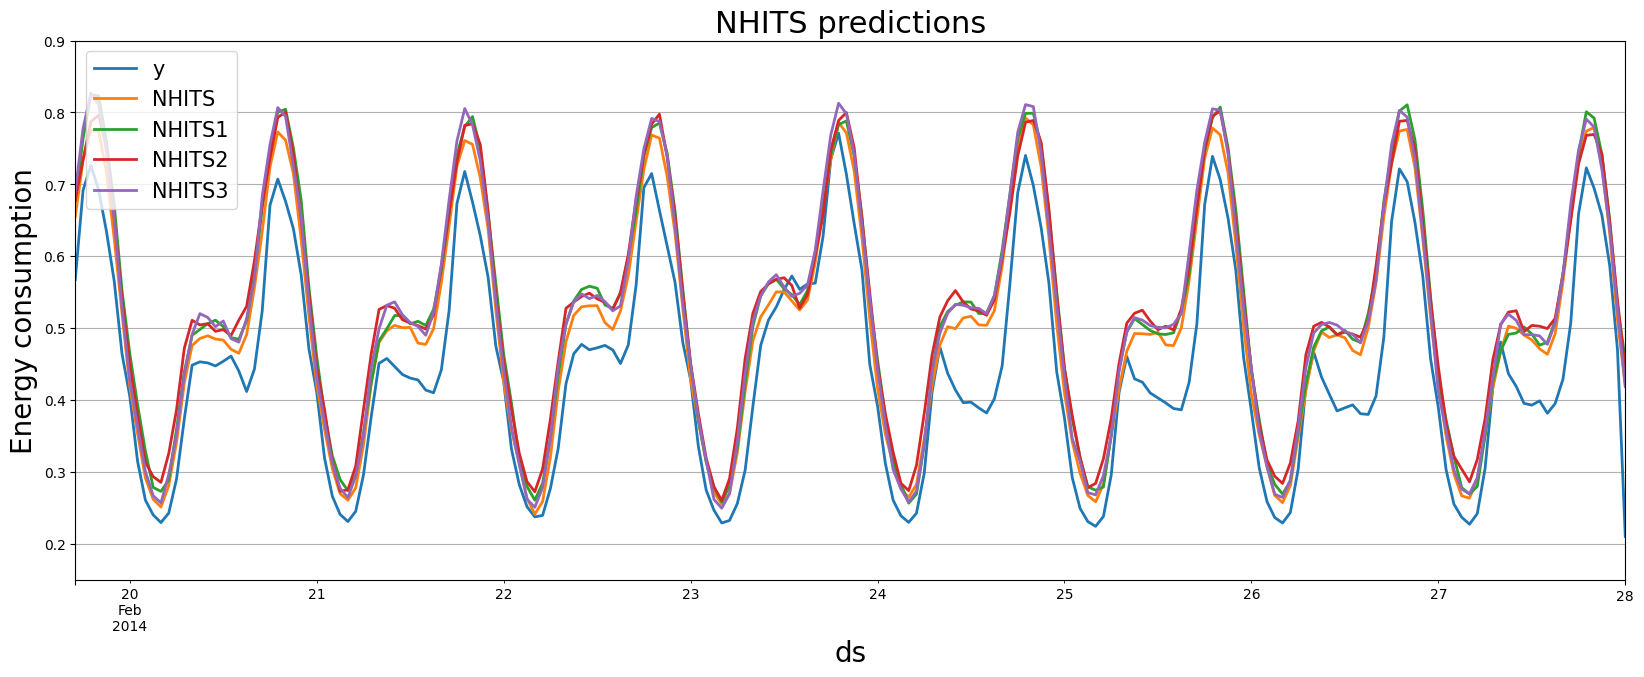

In [89]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))

Y_hat_df[['y', 'NHITS', 'NHITS1','NHITS2','NHITS3']][-200:].plot(ax=ax, linewidth=2)

ax.set_title('NHITS predictions', fontsize=22)
ax.set_ylabel('Energy consumption', fontsize=20)
ax.set_xlabel('ds', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()
plt.ylim(0.15, 0.9)

In [41]:
Y_hat_df.columns

Index(['ds', 'y', 'unique_id', 'NHITS', 'NHITS1', 'NHITS2', 'NHITS3'], dtype='object')

In [58]:
performance = {}
for model in ['NHITS', 'NHITS1', 'NHITS2', 'NHITS3']:
    performance[f"{model}_mae"]=mae(Y_hat_df["y"],Y_hat_df[model])
    performance[f"{model}_mape"]=mape(Y_hat_df["y"],Y_hat_df[model])
    performance[f"{model}_rmse"]=math.sqrt(mean_squared_error(Y_hat_df["y"],Y_hat_df[model]))

In [59]:
performance

{'NHITS_mae': 0.0419867187456154,
 'NHITS_mape': 0.09037271606507491,
 'NHITS_rmse': 0.05597537873668832,
 'NHITS1_mae': 0.040442519620985044,
 'NHITS1_mape': 0.09193288383746699,
 'NHITS1_rmse': 0.052050530650556495,
 'NHITS2_mae': 0.04845893886509174,
 'NHITS2_mape': 0.11433613635677456,
 'NHITS2_rmse': 0.05883897759236624,
 'NHITS3_mae': 0.043480038297947235,
 'NHITS3_mape': 0.09968203379015542,
 'NHITS3_rmse': 0.05476873706438219}

In [49]:
# Y_hat_df.drop(["NHITS_mae","NHITS1_mae","NHITS2_mae","NHITS3_mae"], axis=1,inplace=True)

In [62]:
for model in ['NHITS', 'NHITS1', 'NHITS2', 'NHITS3']:
    Y_hat_df[f"{model}_abs delta"]=abs(Y_hat_df[f"{model}"]-Y_hat_df["y"])
    

In [64]:
for model in ['NHITS', 'NHITS1', 'NHITS2', 'NHITS3']:
    Y_hat_df[f"{model}_abs percentage delta"]=(abs(Y_hat_df[f"{model}"]-Y_hat_df["y"]))/(abs(Y_hat_df["y"]))
    

In [77]:
Y_hat_df

,y,unique_id,NHITS,NHITS1,NHITS2,NHITS3,NHITS_abs delta,NHITS1_abs delta,NHITS2_abs delta,NHITS3_abs delta,NHITS_abs percentage delta,NHITS1_abs percentage delta,NHITS2_abs percentage delta,NHITS3_abs percentage delta
ds,,,,,,,,,,,,,,
2013-09-15 12:00:00,0.500592,energy_consumption,0.454711,0.448762,0.458605,0.449215,0.045881,0.051830,0.041988,0.051377,0.091653,0.103538,0.083876,0.102632
2013-09-15 13:00:00,0.491061,energy_consumption,0.445295,0.439992,0.452759,0.438500,0.045765,0.051069,0.038302,0.052561,0.093196,0.103997,0.077998,0.107035
2013-09-15 14:00:00,0.486360,energy_consumption,0.426624,0.446783,0.437032,0.426358,0.059737,0.039578,0.049329,0.060002,0.122824,0.081376,0.101424,0.123370
2013-09-15 15:00:00,0.501016,energy_consumption,0.429577,0.449515,0.439371,0.433611,0.071439,0.051501,0.061645,0.067405,0.142588,0.102793,0.123039,0.134537
2013-09-15 16:00:00,0.553846,energy_consumption,0.459517,0.466696,0.472653,0.479158,0.094330,0.087150,0.081193,0.074689,0.170318,0.157355,0.146598,0.134855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-27 20:00:00,0.694360,energy_consumption,0.779056,0.792007,0.769346,0.779715,0.084696,0.097647,0.074986,0.085355,0.121977,0.140629,0.107993,0.122926
2014-02-27 21:00:00,0.657011,energy_consumption,0.725305,0.741680,0.741600,0.720652,0.068294,0.084670,0.084589,0.063641,0.103947,0.128871,0.128749,0.096865
2014-02-27 22:00:00,0.587121,energy_consumption,0.631888,0.649929,0.648106,0.638131,0.044767,0.062808,0.060984,0.051010,0.076248,0.106976,0.103870,0.086882


In [66]:
Y_hat_df.columns

Index(['ds', 'y', 'unique_id', 'NHITS', 'NHITS1', 'NHITS2', 'NHITS3',
       'NHITS_abs delta', 'NHITS1_abs delta', 'NHITS2_abs delta',
       'NHITS3_abs delta', 'NHITS_abs percentage delta',
       'NHITS1_abs percentage delta', 'NHITS2_abs percentage delta',
       'NHITS3_abs percentage delta'],
      dtype='object')

(0.0, 0.5)

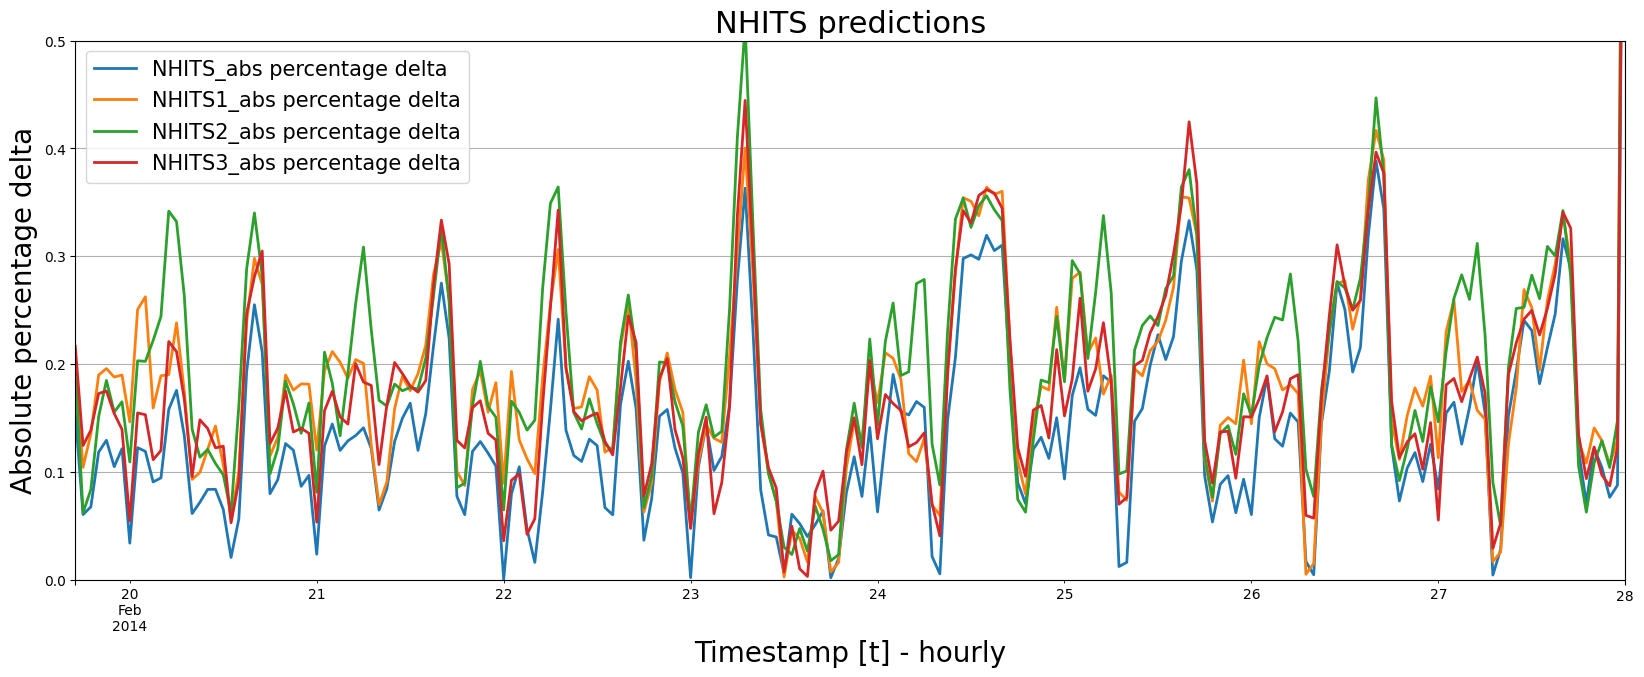

In [88]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))

Y_hat_df[['NHITS_abs percentage delta',
       'NHITS1_abs percentage delta', 'NHITS2_abs percentage delta',
       'NHITS3_abs percentage delta']][-200:].plot(ax=ax, linewidth=2)

ax.set_title('NHITS predictions', fontsize=22)
ax.set_ylabel('Absolute percentage delta', fontsize=20)
ax.set_xlabel('Timestamp [t] - hourly', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()
plt.ylim(0, 0.5)

In [91]:
# models = [NHITS(input_size=100, h=horizon, max_steps=100),
#           LSTM(input_size=100, h=horizon, max_steps = 100)]
models = [NHITS(input_size=2*horizon, h=horizon, max_steps=500)]
nf = NeuralForecast(models=models, freq='H')
nf.fit(df=train)
Y_hat_df = nf.predict().reset_index()

Seed set to 1


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Predicting: |                                                                                    | 0/? [00:00<…

(0.15, 0.9)

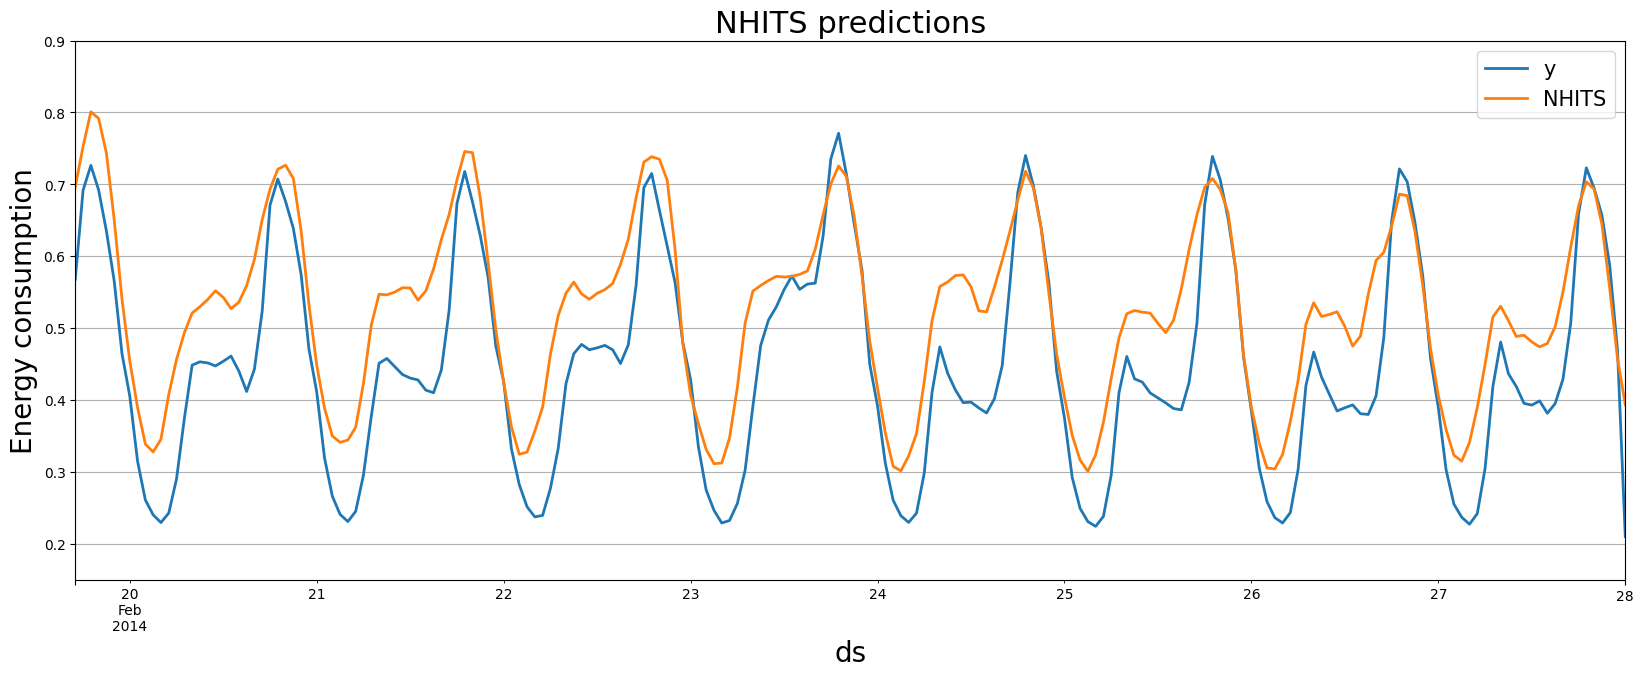

In [92]:
Y_hat_df = test.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])
Y_hat_df = Y_hat_df.set_index('ds')



(0.15, 0.9)

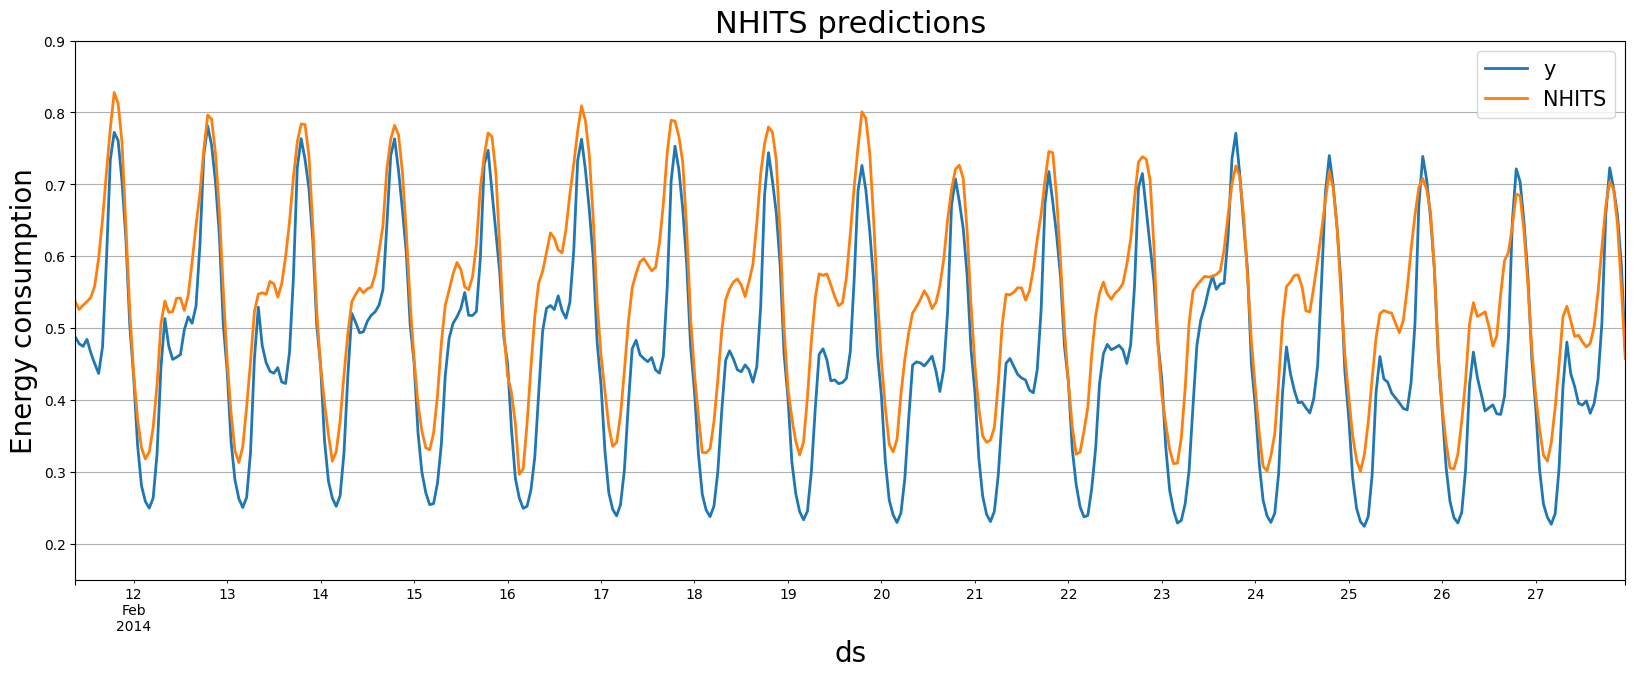

In [100]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
Y_hat_df[['y', 'NHITS']][-400:-1].plot(ax=ax, linewidth=2)

ax.set_title('NHITS predictions', fontsize=22)
ax.set_ylabel('Energy consumption', fontsize=20)
ax.set_xlabel('ds', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()
plt.ylim(0.15, 0.9)

In [95]:
Y_hat_df

,y,unique_id,NHITS
ds,,,
2013-09-15 12:00:00,0.500592,energy_consumption,0.476247
2013-09-15 13:00:00,0.491061,energy_consumption,0.456346
2013-09-15 14:00:00,0.486360,energy_consumption,0.442959
2013-09-15 15:00:00,0.501016,energy_consumption,0.449832
2013-09-15 16:00:00,0.553846,energy_consumption,0.485851
...,...,...,...
2014-02-27 20:00:00,0.694360,energy_consumption,0.693330
2014-02-27 21:00:00,0.657011,energy_consumption,0.644322
2014-02-27 22:00:00,0.587121,energy_consumption,0.555499


In [96]:
performance = {}
performance["NHITS4_mae"]=mae(Y_hat_df["y"],Y_hat_df["NHITS"])
performance["NHITS4_mape"]=mape(Y_hat_df["y"],Y_hat_df["NHITS"])
performance["NHITS4_rmse"]=math.sqrt(mean_squared_error(Y_hat_df["y"],Y_hat_df["NHITS"]))

In [97]:
performance

{'NHITS4_mae': 0.052728678363587446,
 'NHITS4_mape': 0.13156678138833158,
 'NHITS4_rmse': 0.0661132033939703}

In [101]:
Y_hat_df["delta"]=abs(Y_hat_df["NHITS"]-Y_hat_df["y"])

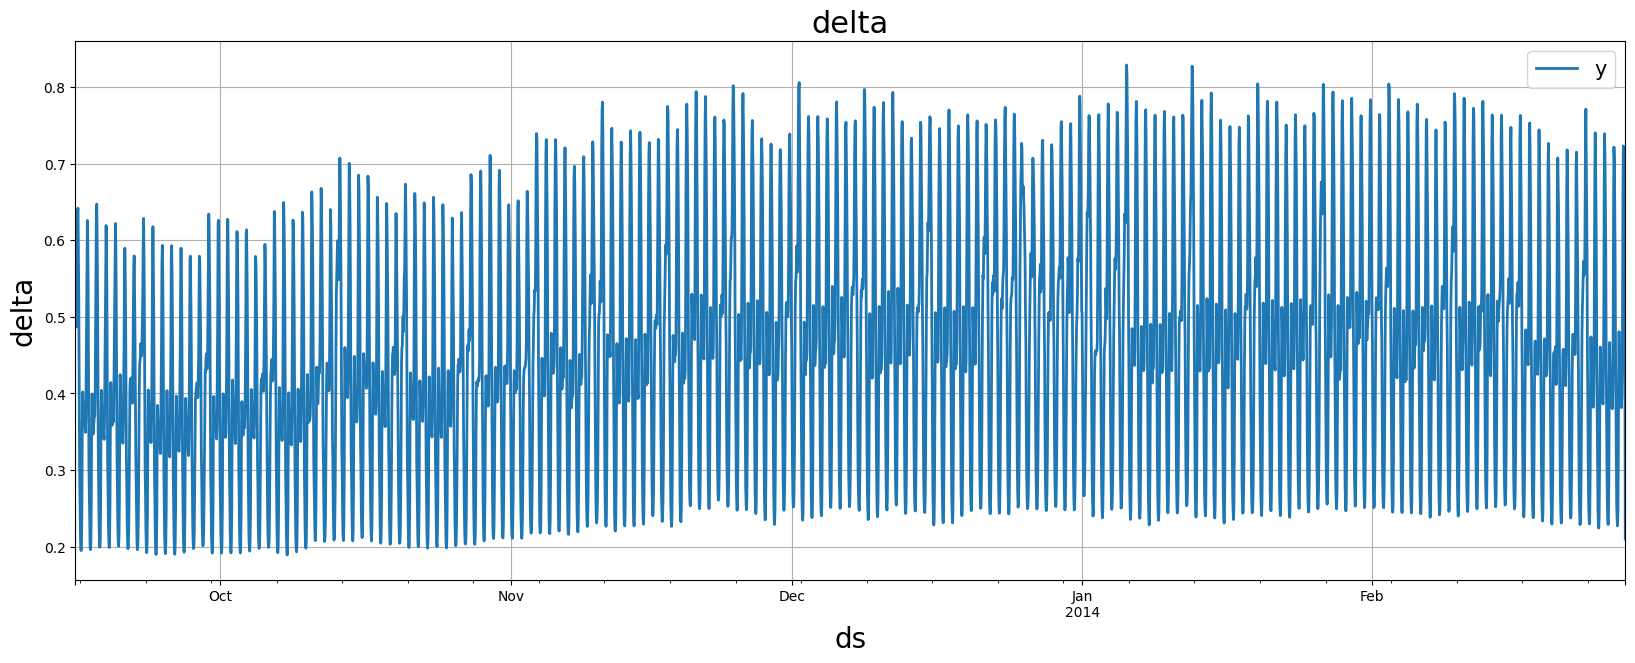

In [102]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
Y_hat_df[['y']].plot(ax=ax, linewidth=2)

ax.set_title('delta', fontsize=22)
ax.set_ylabel('delta', fontsize=20)
ax.set_xlabel('ds', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()